In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
df = pd.read_csv('4xmm_dr14_pn.csv', index_col=0)
df.head()

,iauname,ra,dec,sum_flag,var_flag,mjd_start,mjd_stop,pn_1_flux,pn_2_flux,pn_3_flux,pn_4_flux,pn_5_flux,pn_8_flux,pn_9_flux,pn_hr1,pn_hr2,pn_hr3,pn_hr4
detid,,,,,,,,,,,,,,,,,,
107241502010136,4XMM J000003.9+083724,0.016551,8.623481,0,f,56649.483437,56650.132060,9.047762e-17,4.927044e-16,2.842934e-15,7.823959e-15,4.157968e-14,5.282975e-14,7.947444e-15,0.645586,0.613031,-0.043843,0.222001
109039926010029,4XMM J000047.1-770432,0.196489,-77.075810,0,f,59876.665949,59876.918588,1.428121e-15,1.431736e-14,1.153652e-14,1.349654e-15,0.000000e+00,2.863166e-14,4.995054e-14,0.808140,-0.257345,-0.924666,-1.000000
108626407010068,4XMM J000052.6-554820,0.219280,-55.805568,0,f,59144.643819,59144.964456,5.258978e-15,2.723821e-15,8.565950e-16,1.264200e-14,0.000000e+00,2.148140e-14,1.186262e-14,-0.345079,-0.625308,0.663147,-1.000000
106771806010030,4XMM J000111.7-603626,0.298883,-60.607492,0,f,55853.276794,55853.392477,3.519163e-15,6.669549e-15,1.040939e-14,1.118289e-14,0.000000e+00,3.178100e-14,3.223254e-14,0.235453,0.059927,-0.473219,-1.000000
100417501010112,4XMM J000157.0-301209,0.487603,-30.202565,0,f,52440.846007,52441.417755,1.499197e-15,6.649499e-15,3.047647e-15,0.000000e+00,2.600722e-14,3.720357e-14,2.067541e-14,0.613127,-0.497056,-1.000000,1.000000


In [3]:
df.columns

Index(['iauname', 'ra', 'dec', 'sum_flag', 'var_flag', 'mjd_start', 'mjd_stop',
       'pn_1_flux', 'pn_2_flux', 'pn_3_flux', 'pn_4_flux', 'pn_5_flux',
       'pn_8_flux', 'pn_9_flux', 'pn_hr1', 'pn_hr2', 'pn_hr3', 'pn_hr4'],
      dtype='object')

In [4]:
df.describe()

,ra,dec,sum_flag,mjd_start,mjd_stop,pn_1_flux,pn_2_flux,pn_3_flux,pn_4_flux,pn_5_flux,pn_8_flux,pn_9_flux,pn_hr1,pn_hr2,pn_hr3,pn_hr4
count,564695.000000,564695.000000,564695.0,564695.000000,564695.000000,5.646950e+05,5.646950e+05,5.646950e+05,5.646950e+05,5.646950e+05,5.646950e+05,5.646950e+05,564695.000000,564695.000000,564695.000000,564695.000000
mean,168.270562,-2.972542,0.0,55871.384563,55871.841588,3.065902e-15,6.560653e-15,8.966660e-15,1.738051e-14,4.549282e-14,8.146655e-14,3.111924e-14,0.327827,0.071656,-0.268558,-0.224175
std,103.746145,38.661021,0.0,2370.874851,2370.934204,6.279171e-14,2.520364e-13,7.859748e-13,2.592696e-12,5.394188e-12,8.758057e-12,2.463935e-12,0.529967,0.476313,0.463587,0.627152
min,0.000981,-88.192989,0.0,51577.464016,51577.511956,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.300854e-17,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000
25%,71.696477,-33.208676,0.0,53806.790243,53807.274086,1.399562e-16,6.466692e-16,1.268779e-15,1.807813e-15,4.749410e-16,1.065925e-14,4.726631e-15,0.044845,-0.221502,-0.566189,-0.912843
50%,173.213553,-2.956893,0.0,55999.177465,55999.404248,6.826475e-16,1.736776e-15,2.726051e-15,4.381805e-15,9.353245e-15,2.224847e-14,9.107056e-15,0.365822,0.041412,-0.323995,-0.238374
75%,254.774291,28.504815,0.0,57882.961991,57883.182373,2.093502e-15,4.153838e-15,5.729138e-15,9.407917e-15,2.599744e-14,4.777439e-14,1.866274e-14,0.745130,0.380340,-0.040110,0.216540
max,359.998930,89.404105,0.0,60264.352199,60264.884618,2.753889e-11,1.265237e-10,4.016920e-10,1.469205e-09,3.593894e-09,5.303201e-09,1.160295e-09,1.000000,1.000000,1.000000,1.000000


In [5]:
df_flux_robust_scaled = df[['pn_1_flux', 'pn_2_flux', 'pn_3_flux', 'pn_4_flux', 'pn_5_flux', 'pn_8_flux', 'pn_9_flux']].copy()
df_flux_robust_scaled = RobustScaler(quantile_range=(5, 95)).fit_transform(df_flux_robust_scaled)
df_flux_robust_scaled = pd.DataFrame(df_flux_robust_scaled, columns=['pn_1_flux', 'pn_2_flux', 'pn_3_flux', 'pn_4_flux', 'pn_5_flux', 'pn_8_flux', 'pn_9_flux'])
df_flux_robust_scaled

,pn_1_flux,pn_2_flux,pn_3_flux,pn_4_flux,pn_5_flux,pn_8_flux,pn_9_flux
0,-0.063621,-0.072851,0.005881,0.109049,0.324602,0.185915,-0.017346
1,0.080092,0.736697,0.443307,-0.096060,-0.094211,0.038806,0.610952
2,0.491669,0.057800,-0.094064,0.261687,-0.094211,-0.004663,0.041219
3,0.304748,0.288855,0.386595,0.215462,-0.094211,0.057952,0.345919
4,0.087728,0.287680,0.016181,-0.138818,0.167748,0.090918,0.173044
...,...,...,...,...,...,...,...
564690,-0.001185,-0.071995,-0.012223,-0.079544,0.082396,0.004974,-0.062814
564691,0.098128,0.447280,0.084669,0.048361,-0.020100,0.038892,0.247780
564692,0.376884,0.078419,0.018223,-0.031472,-0.073356,-0.039120,0.029453
564693,0.077178,-0.054273,0.037008,0.573973,0.341447,0.298955,0.095124


In [6]:
df_flux_robust_scaled.describe()

,pn_1_flux,pn_2_flux,pn_3_flux,pn_4_flux,pn_5_flux,pn_8_flux,pn_9_flux
count,564695.000000,564695.000000,564695.000000,564695.000000,564695.000000,564695.000000,564695.000000
mean,0.256051,0.282478,0.314002,0.411806,0.364017,0.360008,0.329266
std,6.746178,14.758812,39.547099,82.137938,54.333138,53.243422,36.856432
min,-0.073342,-0.101703,-0.137164,-0.138818,-0.094211,-0.135056,-0.136227
25%,-0.058305,-0.063835,-0.073324,-0.081545,-0.089427,-0.070455,-0.065524
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.151579,0.141539,0.151103,0.159230,0.167649,0.155181,0.142937
max,2958.633544,7408.904563,20211.390573,46545.027400,36199.518832,32239.958758,17355.982959


In [7]:
# clip the outliers
df_flux_robust_scaled = df_flux_robust_scaled.clip(lower=-1, upper=1)
df_flux_robust_scaled.describe()

,pn_1_flux,pn_2_flux,pn_3_flux,pn_4_flux,pn_5_flux,pn_8_flux,pn_9_flux
count,564695.000000,564695.000000,564695.000000,564695.000000,564695.000000,564695.000000,564695.000000
mean,0.114326,0.104437,0.100606,0.099482,0.110038,0.105928,0.102739
std,0.274485,0.272296,0.275691,0.278762,0.281776,0.276927,0.273032
min,-0.073342,-0.101703,-0.137164,-0.138818,-0.094211,-0.135056,-0.136227
25%,-0.058305,-0.063835,-0.073324,-0.081545,-0.089427,-0.070455,-0.065524
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.151579,0.141539,0.151103,0.159230,0.167649,0.155181,0.142937
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


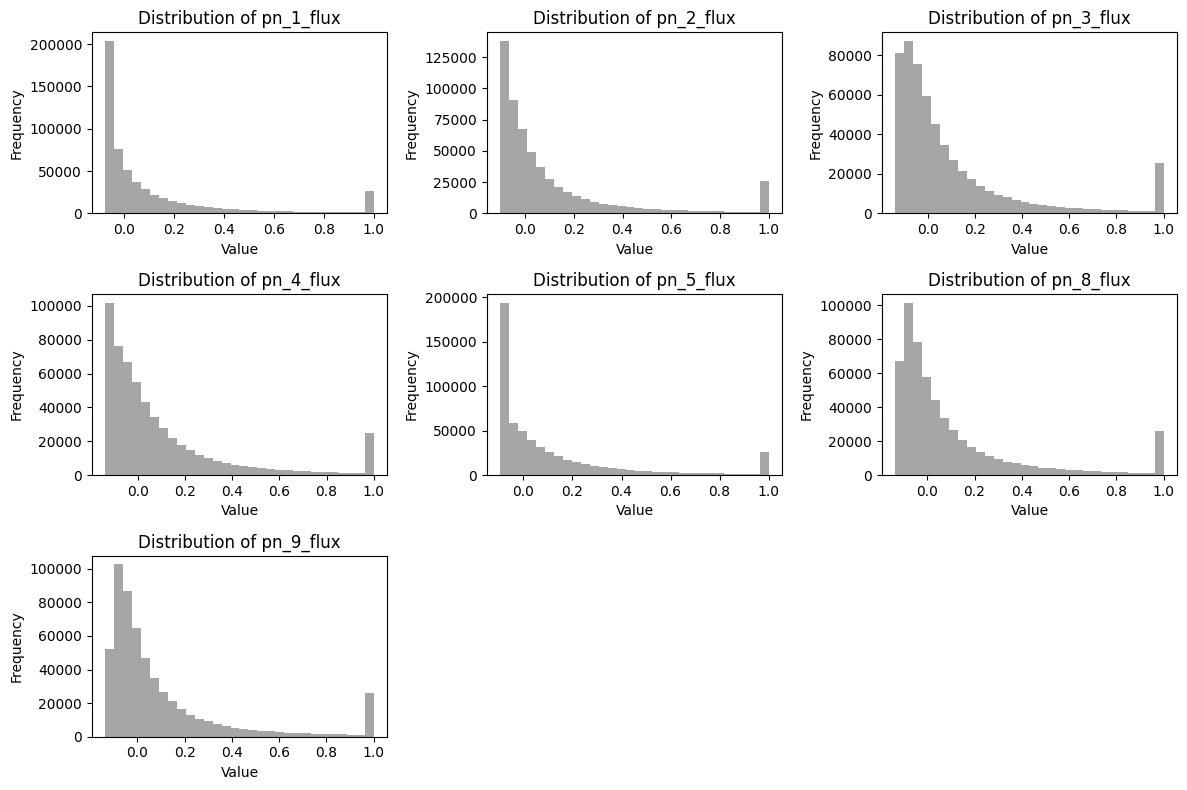

In [8]:
# plot the distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_flux_robust_scaled.columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(df_flux_robust_scaled[col], bins=30, color='gray', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [9]:
df_features = df[[
'pn_1_flux', 'pn_2_flux', 'pn_3_flux', 'pn_4_flux', 'pn_5_flux',
'pn_8_flux', 'pn_9_flux'
]]
df_features.head()

,pn_1_flux,pn_2_flux,pn_3_flux,pn_4_flux,pn_5_flux,pn_8_flux,pn_9_flux
detid,,,,,,,
107241502010136,9.047762e-17,4.927044e-16,2.842934e-15,7.823959e-15,4.157968e-14,5.282975e-14,7.947444e-15
109039926010029,1.428121e-15,1.431736e-14,1.153652e-14,1.349654e-15,0.000000e+00,2.863166e-14,4.995054e-14
108626407010068,5.258978e-15,2.723821e-15,8.565950e-16,1.264200e-14,0.000000e+00,2.148140e-14,1.186262e-14
106771806010030,3.519163e-15,6.669549e-15,1.040939e-14,1.118289e-14,0.000000e+00,3.178100e-14,3.223254e-14
100417501010112,1.499197e-15,6.649499e-15,3.047647e-15,0.000000e+00,2.600722e-14,3.720357e-14,2.067541e-14


In [10]:
# scaling of the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(scaled_data, columns=df_features.columns, index=df_features.index)
# PCA
pca = PCA(n_components=0.99)  # retain 99% of variance
pca.fit(df_features_scaled)
pca.explained_variance_ratio_

array([0.84321337, 0.12889399, 0.02382372])

In [11]:
df_pca = pca.transform(df_features_scaled)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
df_pca.head()   

,PC1,PC2,PC3
0,-0.034482,-0.035315,-0.023679
1,-0.001102,0.010596,-0.032735
2,-0.007400,0.015675,0.033206
3,-0.002671,0.011205,0.001231
4,-0.018873,-0.008610,-0.015088


In [12]:
# interpretation of the PCA components
pca.components_
pca_components = pd.DataFrame(pca.components_, columns=df_features.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_components

,pn_1_flux,pn_2_flux,pn_3_flux,pn_4_flux,pn_5_flux,pn_8_flux,pn_9_flux
PC1,0.336166,0.359014,0.395829,0.395076,0.359052,0.386365,0.408827
PC2,0.516049,0.489823,0.177858,-0.291459,-0.497416,-0.358889,0.031006
PC3,0.737612,-0.227087,-0.492080,-0.029941,0.281160,0.118898,-0.261023


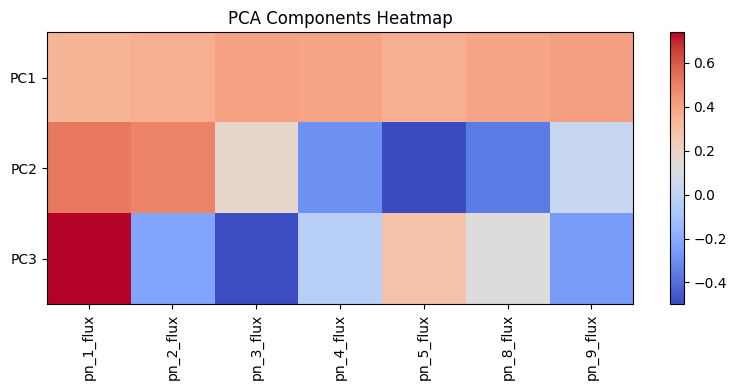

In [ ]:
# visualization using a heatmap
plt.figure(figsize=(8, 4))
plt.imshow(pca_components, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(pca_components.columns)), labels=pca_components.columns, rotation=90)
plt.yticks(ticks=np.arange(len(pca_components.index)), labels=pca_components.index)
plt.title('PCA Components Heatmap')
# adding text inside the heatmap
for i in range(pca_components.shape[0]):
    for j in range(pca_components.shape[1]):
        plt.text(j, i, f'{pca_components.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

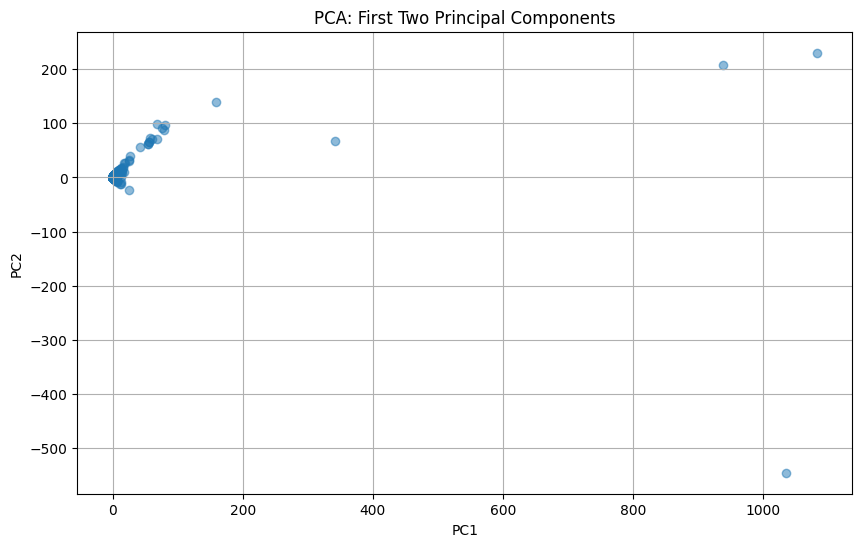

In [14]:
# scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [15]:
# create a dataframe with for each row the reconstruction errors for each PCA component
# subtract the original data from the PCA inverse transformed data
df_reconstruction = pd.DataFrame(pca.inverse_transform(df_pca.values), columns=df_features.columns, index=df_features.index)
df_reconstruction_errors = df_features_scaled - df_reconstruction

In [16]:
df_reconstruction_errors_scaled = StandardScaler().fit_transform(df_reconstruction_errors)
df_reconstruction_errors_scaled = pd.DataFrame(df_reconstruction_errors_scaled, columns=df_features.columns, index=df_features.index)
df_reconstruction_errors_scaled.head()

,pn_1_flux,pn_2_flux,pn_3_flux,pn_4_flux,pn_5_flux,pn_8_flux,pn_9_flux
detid,,,,,,,
107241502010136,-0.002351,0.001889,0.006148,-0.024323,0.014539,0.010907,-0.011211
109039926010029,-0.158694,0.155940,-0.180420,-0.083136,0.125329,0.117370,-0.022245
108626407010068,0.109006,-0.106807,0.077825,0.152101,-0.142453,-0.129991,0.096744
106771806010030,0.032175,-0.032097,0.019016,0.044944,-0.043756,-0.043061,0.043298
100417501010112,-0.068458,0.066578,-0.075182,-0.050445,0.060824,0.052952,-0.005539


In [17]:
# apply PCA to the reconstruction errors
pca_reconstruction_errors = PCA(n_components=0.99)
pca_reconstruction_errors.fit(df_reconstruction_errors_scaled.values)
pca_reconstruction_errors.explained_variance_ratio_

array([0.83060364, 0.1019201 , 0.06747626])

In [18]:
# interpret the PCA components of the reconstruction errors
pca_reconstruction_errors.components_
# create a DataFrame for the PCA components of the reconstruction errors
pca_reconstruction_errors_components = pd.DataFrame(pca_reconstruction_errors.components_,
                                                   columns=df_reconstruction_errors_scaled.columns,
                                                   index=[f'PC{i+1}' for i in range(pca_reconstruction_errors.n_components_)])
pca_reconstruction_errors_components

,pn_1_flux,pn_2_flux,pn_3_flux,pn_4_flux,pn_5_flux,pn_8_flux,pn_9_flux
PC1,-0.404348,0.403770,-0.359220,-0.322538,0.404996,0.412092,-0.326435
PC2,-0.260402,0.270219,-0.579344,0.615901,-0.205768,-0.101248,0.302667
PC3,-0.046249,-0.004463,-0.147518,-0.513423,0.184801,-0.106089,0.816744


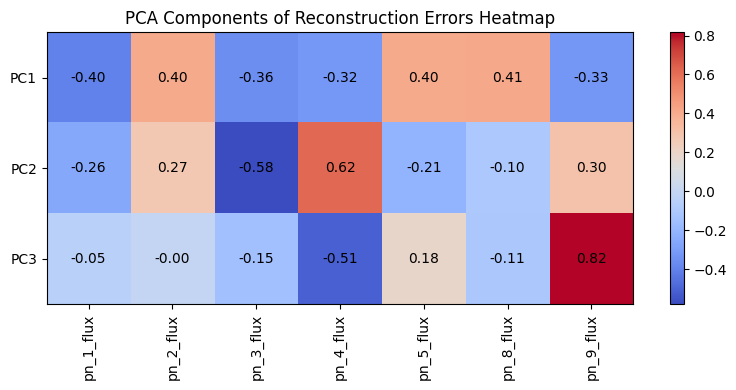

In [19]:
# visualize it using a heatmap
plt.figure(figsize=(8, 4))
plt.imshow(pca_reconstruction_errors_components, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(pca_reconstruction_errors_components.columns)), labels=pca_reconstruction_errors_components.columns, rotation=90)
plt.yticks(ticks=np.arange(len(pca_reconstruction_errors_components.index)), labels=pca_reconstruction_errors_components.index)
plt.title('PCA Components of Reconstruction Errors Heatmap')
plt.tight_layout()
# adding text inside the heatmap
for i in range(pca_reconstruction_errors_components.shape[0]):
    for j in range(pca_reconstruction_errors_components.shape[1]):
        plt.text(j, i, f'{pca_reconstruction_errors_components.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.show()

In [20]:
df_pca_reconstruction_errors = pca_reconstruction_errors.transform(df_reconstruction_errors_scaled.values)
df_pca_reconstruction_errors = pd.DataFrame(df_pca_reconstruction_errors,
                                            columns=[f'PC{i+1}' for i in range(df_pca_reconstruction_errors.shape[1])],
                                            index=df_reconstruction_errors_scaled.index)
df_pca_reconstruction_errors

,PC1,PC2,PC3
detid,,,
107241502010136,0.021392,-0.024909,0.004055
109039926010029,0.325143,0.092379,0.068483
108626407010068,-0.307058,0.063100,-0.027657
106771806010030,-0.096898,0.026081,0.004620
100417501010112,0.146103,0.028751,0.040958
...,...,...,...
106012119010092,-0.032789,-0.020051,0.000236
106553401470013,0.189002,0.094979,-0.013497
106732701010017,-0.194204,0.002554,-0.010170


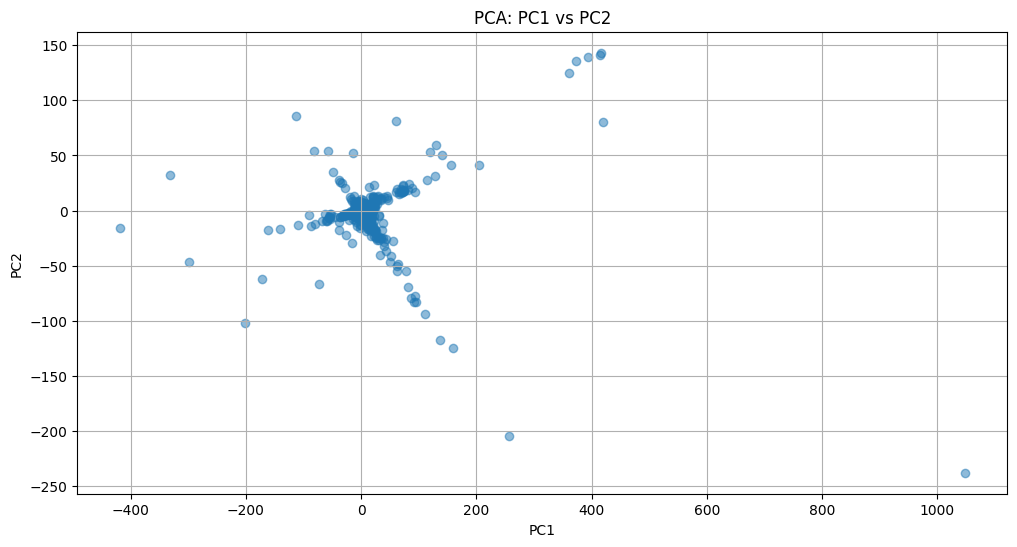

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,)
plt.title('PCA: PC1 vs PC2') # almost 95% of the variance!
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

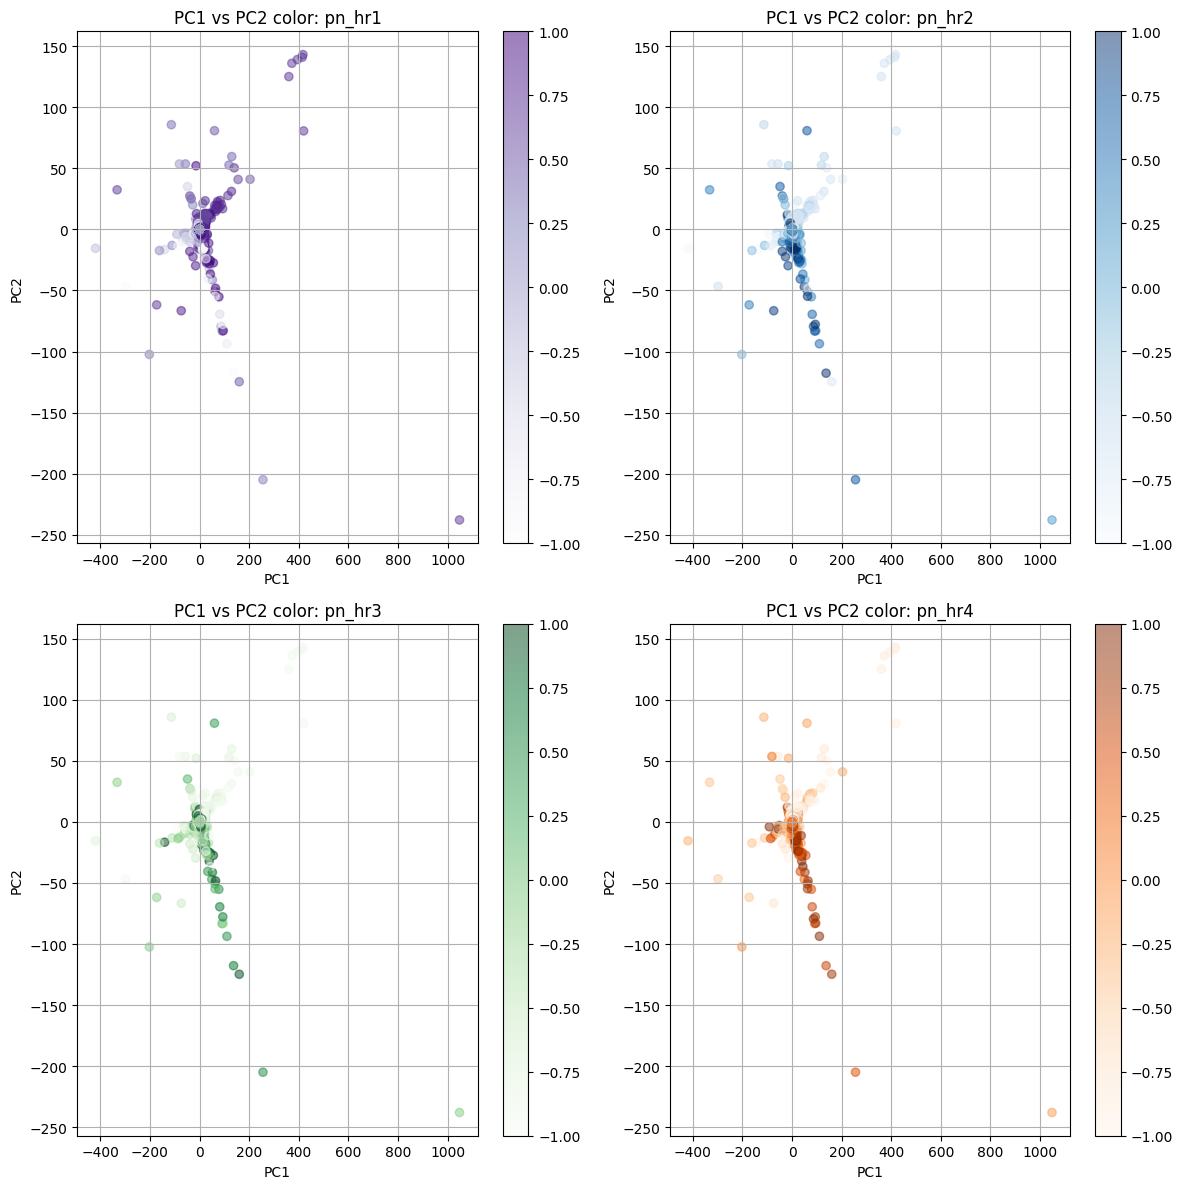

In [22]:
# creating 4 plots with hardness ratio colouring (for PCA1 vs PCA2)
#'pn_hr1' colouring
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df['pn_hr1'], cmap='Purples')
plt.title('PC1 vs PC2 color: pn_hr1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'pn_hr2' colouring
plt.subplot(2, 2, 2)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df['pn_hr2'], cmap='Blues')
plt.title('PC1 vs PC2 color: pn_hr2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'pn_hr3' colouring
plt.subplot(2, 2, 3)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df['pn_hr3'], cmap='Greens')
plt.title('PC1 vs PC2 color: pn_hr3')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'pn_hr4' colouring
plt.subplot(2, 2, 4)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df['pn_hr4'], cmap='Oranges')
plt.title('PC1 vs PC2 color: pn_hr4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
plt.tight_layout()
# shows the color scale
plt.show()

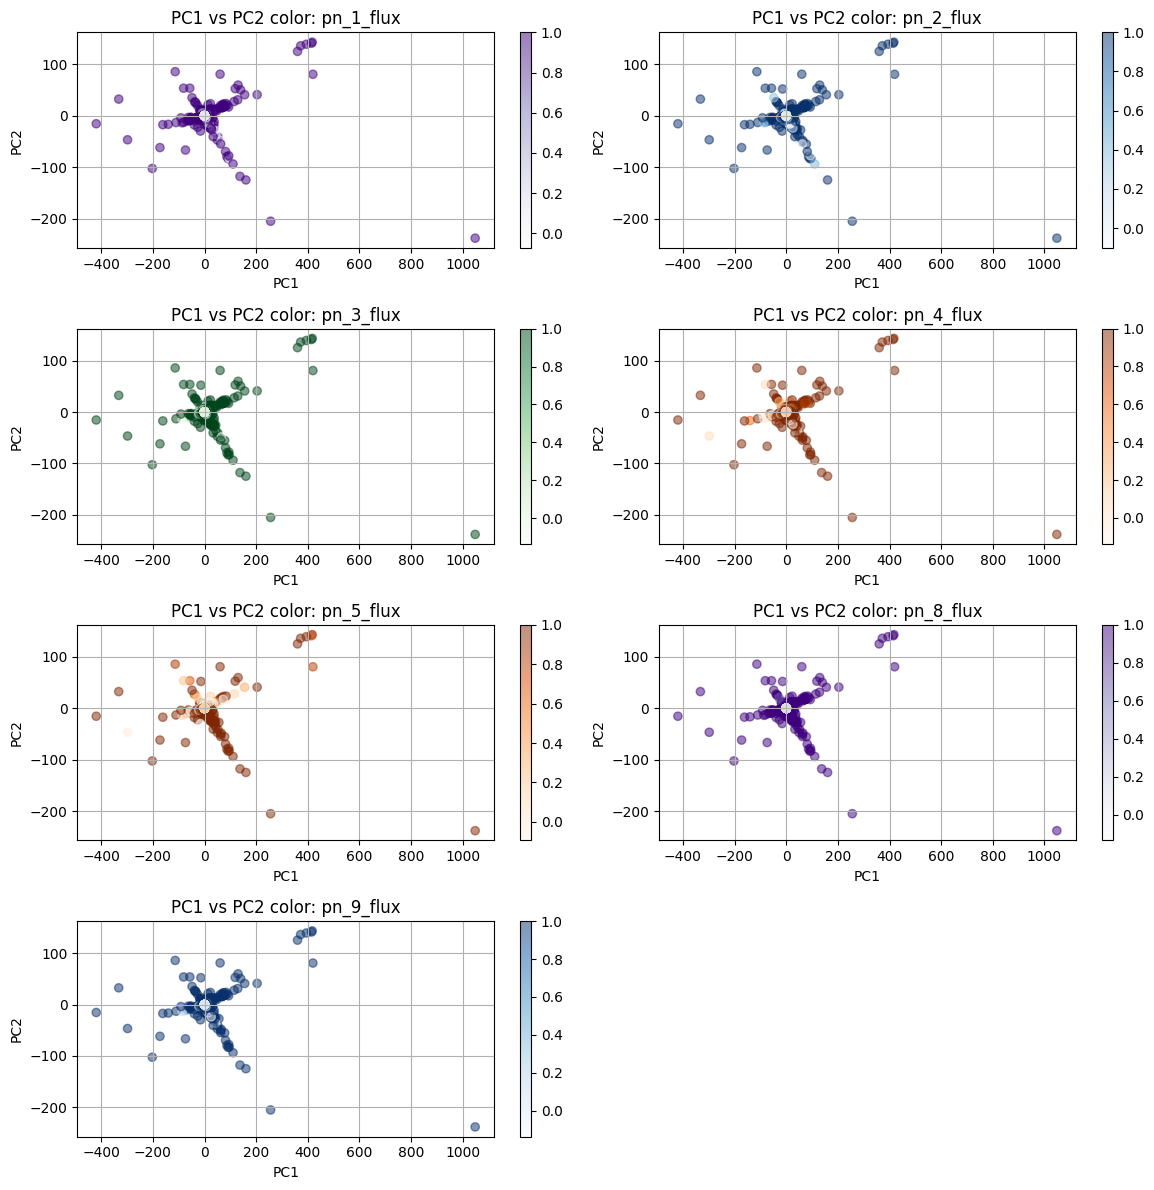

In [23]:
# creating 7 plots with fluxes as colouring (for PCA1 vs PCA2)
#'pn_1_flux' colouring
plt.figure(figsize=(12, 12))
plt.subplot(4, 2, 1)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['pn_1_flux'], cmap='Purples')
plt.title('PC1 vs PC2 color: pn_1_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'pn_2_flux' colouring
plt.subplot(4, 2, 2)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['pn_2_flux'], cmap='Blues')
plt.title('PC1 vs PC2 color: pn_2_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'pn_3_flux' colouring
plt.subplot(4, 2, 3)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['pn_3_flux'], cmap='Greens')
plt.title('PC1 vs PC2 color: pn_3_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'pn_4_flux' colouring
plt.subplot(4, 2, 4)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['pn_4_flux'], cmap='Oranges')
plt.title('PC1 vs PC2 color: pn_4_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'pn_5_flux' colouring
plt.subplot(4, 2, 5)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['pn_5_flux'], cmap='Oranges')
plt.title('PC1 vs PC2 color: pn_5_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'pn_8_flux' colouring
plt.subplot(4, 2, 6)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['pn_8_flux'], cmap='Purples')
plt.title('PC1 vs PC2 color: pn_8_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'pn_9_flux' colouring
plt.subplot(4, 2, 7)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['pn_9_flux'], cmap='Blues')
plt.title('PC1 vs PC2 color: pn_9_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
plt.tight_layout()
# shows the color scale
plt.show()

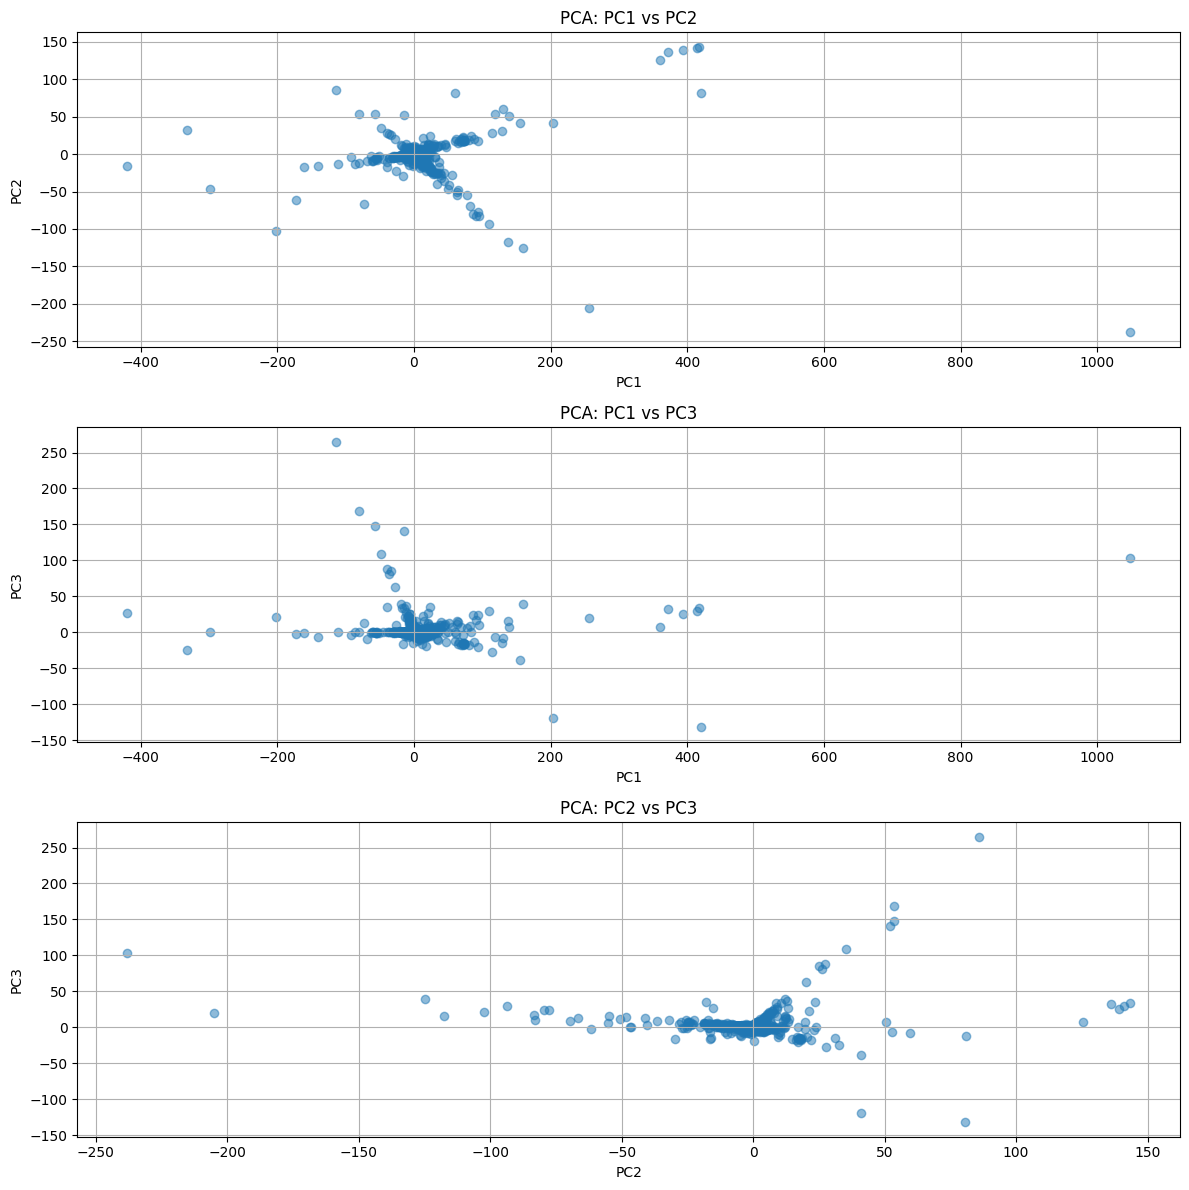

In [24]:
# creating a plots for PCA components
# PCA1 vs PCA2
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5)
plt.title('PCA: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
# PCA1 vs PCA3
plt.subplot(3, 1, 2)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC3'], alpha=0.5)
plt.title('PCA: PC1 vs PC3')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.grid()
# PCA2 vs PCA3
plt.subplot(3, 1, 3)
plt.scatter(df_pca_reconstruction_errors['PC2'], df_pca_reconstruction_errors['PC3'], alpha=0.5)
plt.title('PCA: PC2 vs PC3')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.grid()
plt.tight_layout()
plt.show()